In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sphere_difraction import calculate_electric_field_far

In [2]:
def FirstTest():
    lmbd = 2 * np.pi / 1000.0 # wave length
    k = 2 * np.pi / lmbd # wave number

    eps = [1, complex(1.1,0.1), 2.5] # permittivities of layers
    eps.append(8.85e-12) # permittivity of vacuum (outer space)

    r = [0.01, 
         0.01 + np.pi/k, 
         0.01 + np.pi/k + 0.5 /k] # concentric spheres radiuses

    return calculate_electric_field_far(r, eps, lmbd)


In [3]:
def SimpleSphereTest():
    lmbd = 2 * np.pi / 1000.0 # wave length
    k = 2 * np.pi / lmbd # wave number

    eps = [1] # permittivities of layers
    eps.append(8.85e-12) # permittivity of vacuum (outer space)

    r = [0.01] # concentric spheres radiuses

    return calculate_electric_field_far(r, eps, lmbd)

e:\Archive\MSU\Магистратура\Diplom\Sphere difraction\sphere_difraction.py:93: RuntimeWarning: invalid value encountered in scalar divide
  first_term = sp.lpmv(1, n, cos_th) / sin_th
e:\Archive\MSU\Магистратура\Diplom\Sphere difraction\sphere_difraction.py:20: RuntimeWarning: invalid value encountered in scalar divide
  return (n * x * sp.lpmv(m, n, x) - (n + m) * sp.lpmv(m, n - 1, x)) / (x ** 2 - 1)


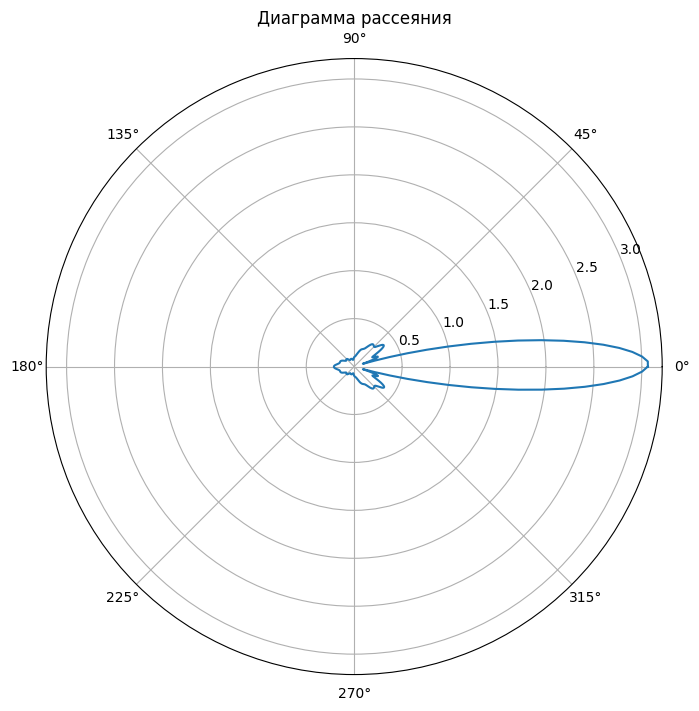

In [3]:
vE_theta, _ = FirstTest()
#vE_theta, _ = SimpleSphereTest()

y_values = [abs(c) for c in vE_theta][:]
# Количество точек
num_points = len(y_values)

# Создаём массив углов (переводим в радианы)
theta = np.linspace(0, 2 * np.pi, num_points)  # Углы в радианах

# Создаём полярный график
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')

# Строим график
ax.plot(theta, y_values, linestyle='-')
#ax.plot(theta, 10 * np.log10(y_values), linestyle='-')

# Заголовок
ax.set_title('Диаграмма рассеяния')

plt.show()

In [ ]:
# --- Параметры среды ---
Z0 = 377  # Волновое сопротивление вакуума, Ом
E_inc = 1 # Модуль падающего электрического поля (можно изменить)

# --- Расчет ЭПР ---
def compute_rcs(E_scat):
    """Вычисляет дифференциальную и интегральную ЭПР."""
    N = len(E_scat)
    theta = np.linspace(0, 2*np.pi, N, endpoint=False)  # Углы от 0 до 2π

    # Вычисляем плотность мощности рассеянного поля
    S_scat = np.abs(E_scat)**2 / (2 * Z0)

    # Вычисляем дифференциальную ЭПР
    r = 1  # Достаточно большое расстояние (нормируем)
    sigma_theta = 2 * np.pi * r * S_scat / (E_inc**2)

    # Интегрируем по углам (метод трапеций)
    sigma_total = np.trapezoid(sigma_theta, theta)

    return theta, sigma_theta, sigma_total

# --- Запуск кода ---
E_scat = read_complex_numbers(filename)
theta, sigma_theta, sigma_total = compute_rcs(E_scat)
sigma_theta = np.maximum(sigma_theta, 1e-12)  # Избегаем log(0)


# --- Вывод результатов ---
print(f"Интегральная ЭПР: {sigma_total:.6f} м²")

# --- График распределения ЭПР ---
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

plt.polar(theta, sigma_theta, label="Дифференциальная ЭПР")
#plt.polar(theta, 10 * np.log10(sigma_theta), label="Дифференциальная ЭПР (дБ)")


plt.title("Диаграмма рассеяния (ЭПР)")
plt.legend()
plt.show()